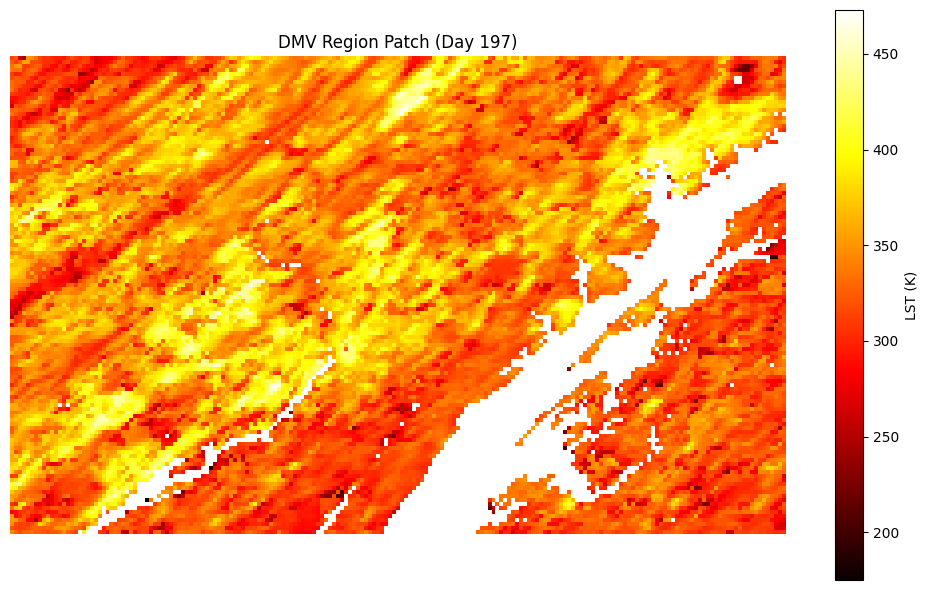

In [9]:
# Import libraries
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from rasterio.windows import from_bounds
from rasterio.plot import show
from rasterio.warp import transform_bounds

# Load a single day's .tif file
tif_path = '../data/raw/gf_Day2020_197.tif' 

# Approximate lat/lon bounds of the DMV region (DC + Maryland + Virginia)
dmv_bounds_latlon = {
    'left': -77.5,    # West
    'right': -76.5,   # East
    'bottom': 38.5,   # South
    'top': 39.5       # North
}

# Open raster and transform geographic bounds into raster CRS
with rasterio.open(tif_path) as src:
    # Convert WGS84 lat/lon bounds to the raster's projection
    dmv_bounds_proj = transform_bounds('EPSG:4326', src.crs,
                                       dmv_bounds_latlon['left'],
                                       dmv_bounds_latlon['bottom'],
                                       dmv_bounds_latlon['right'],
                                       dmv_bounds_latlon['top'])

    # Extract window using projected bounding box
    window = from_bounds(*dmv_bounds_proj, transform=src.transform)
    patch = src.read(1, window=window)
    patch = patch.astype(np.float32)
    patch[patch <= 0] = np.nan  # Mask invalid values

# Visualize the patch
plt.figure(figsize=(10, 6))
plt.imshow(patch, cmap='hot')
plt.colorbar(label='LST (K)')
plt.title('DMV Region Patch (Day 197)')
plt.axis('off')
plt.tight_layout()
plt.show()


In [10]:
PATCH_SIZE = 64

# Test loop
valid_patch_count = 0
total_patch_count = 0
for i in range(0, patch.shape[0] - PATCH_SIZE + 1, PATCH_SIZE):
    for j in range(0, patch.shape[1] - PATCH_SIZE + 1, PATCH_SIZE):
        p = patch[i:i+PATCH_SIZE, j:j+PATCH_SIZE]
        total_patch_count += 1
        if np.isnan(p).mean() <= 0.1:
            valid_patch_count += 1

print(f"Total patch candidates: {total_patch_count}")
print(f"Valid patches (nan <= 10%): {valid_patch_count}")


Total patch candidates: 3
Valid patches (nan <= 10%): 2


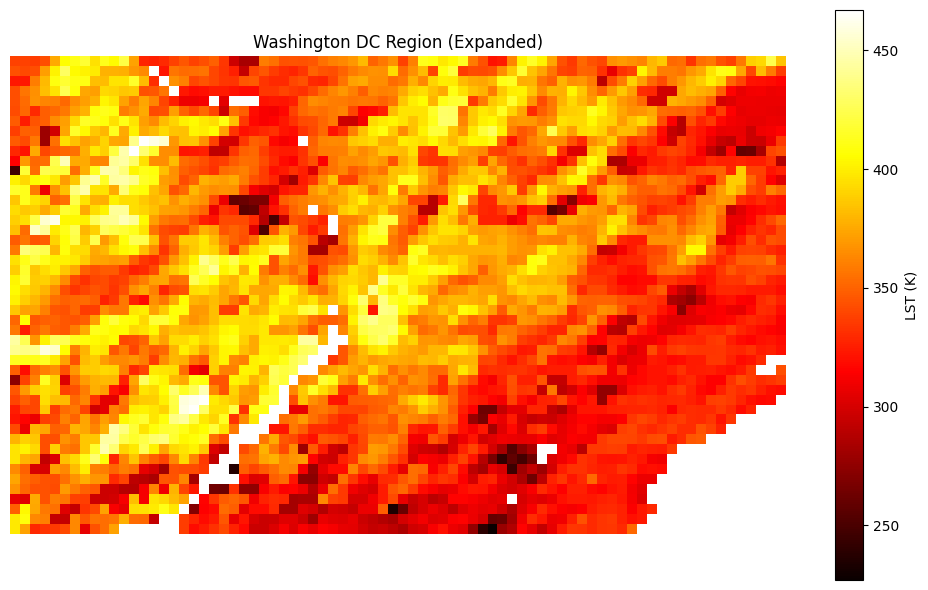

✅ Total patch candidates: 2
✅ Valid patches (NaN <= 10%): 2


In [21]:
# Import libraries
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from rasterio.windows import from_bounds
from rasterio.plot import show
from rasterio.warp import transform_bounds

# ------------------------------
# 1. Input tif file
# ------------------------------
tif_path = '../data/raw/gf_Day2020_197.tif'

# ------------------------------
# 2. Expand DC bounding box (in lat/lon)
# ------------------------------
dmv_bounds_latlon = {
    'left': -77.30,   # 更往西
    'right': -76.80,  # 更往东
    'bottom': 38.60,  # 更往南
    'top': 39.10      # 更往北
}


# ------------------------------
# 3. Open tif and crop to DC region
# ------------------------------
with rasterio.open(tif_path) as src:
    # Convert lat/lon to projected coordinates (e.g., EPSG:3857 or 4326 -> native raster CRS)
    dc_bounds_proj = transform_bounds('EPSG:4326', src.crs,
                                      dc_bounds_latlon['left'],
                                      dc_bounds_latlon['bottom'],
                                      dc_bounds_latlon['right'],
                                      dc_bounds_latlon['top'])

    # Get window and extract patch
    window = from_bounds(*dc_bounds_proj, transform=src.transform)
    patch = src.read(1, window=window).astype(np.float32)

# ------------------------------
# 4. Clean invalid values
# ------------------------------
patch[patch <= 0] = np.nan  # Replace invalid values with NaN

# ------------------------------
# 5. Visualize the extracted patch
# ------------------------------
plt.figure(figsize=(10, 6))
plt.imshow(patch, cmap='hot')
plt.colorbar(label='LST (K)')
plt.title('Washington DC Region (Expanded)')
plt.axis('off')
plt.tight_layout()
plt.show()

# ------------------------------
# 6. Count valid patches
# ------------------------------
PATCH_SIZE = 32
valid_patch_count = 0
total_patch_count = 0

for i in range(0, patch.shape[0] - PATCH_SIZE + 1, PATCH_SIZE):
    for j in range(0, patch.shape[1] - PATCH_SIZE + 1, PATCH_SIZE):
        p = patch[i:i+PATCH_SIZE, j:j+PATCH_SIZE]
        total_patch_count += 1
        if np.isnan(p).mean() <= 0.1:
            valid_patch_count += 1

print(f"✅ Total patch candidates: {total_patch_count}")
print(f"✅ Valid patches (NaN <= 10%): {valid_patch_count}")


In [22]:
print("Cropped patch shape:", patch.shape)


Cropped patch shape: (48, 78)


In [23]:
print("Min:", np.nanmin(patch), "Max:", np.nanmax(patch))
print("NaN ratio:", np.isnan(patch).mean())


Min: 227.0 Max: 467.0
NaN ratio: 0.05422008547008547
